In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [3]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima_df.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [5]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]

In [6]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_predict = model.predict(X_test)

In [15]:
accuracy_score(y_predict,y_test)

0.7489177489177489

In [16]:
metrics.confusion_matrix(y_predict, y_test)

array([[127,  38],
       [ 20,  46]], dtype=int64)

In [18]:
sum(y_test)

84

### Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 46

True Negatives (TN): we correctly predicted that they don't have diabetes 134

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38
Falsely predict negative Type II error

### Definitions:

Accuracy: (TN + TP)/(TN + TP + FP + FN)

Recall: TP/(TP+FN)   Recall synonyms: True positive rate, Sensitivity

False positive rate: FP/(TN + FP)

Specificity: TN/(TN+FP)   ( this is recall of 0 class ) 

Precision: TP/(TP+FP)

Fscore = 2*(Precision * Recall)/( Precision + Recall)

In [19]:
from sklearn.metrics import roc_curve, auc

In [20]:
y_predictProb = model.predict_proba(X_train)

In [23]:
#y_predictProb

In [24]:
#y_predictProb[::,1]

In [25]:
#y_predictProb[::,1] > 0.97050301   # (FPR, TPR)

In [26]:
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

In [28]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8344931641827812

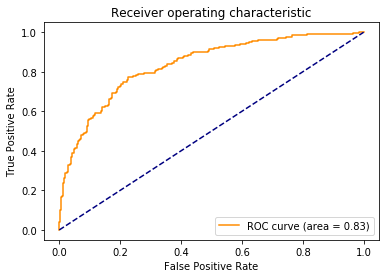

In [29]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [27]:
optimalF1 = 0
optimalTh = 0

In [28]:
thresholds[0:10]

array([1.97050301, 0.97050301, 0.8871462 , 0.88409627, 0.81854779,
       0.80166898, 0.75346321, 0.75056231, 0.75007755, 0.7499674 ])

In [29]:
for th in thresholds:
    preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = f1_score(y_train, preds)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th

C:\ProgramData\Anaconda3_new\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3_new\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
optimalF1 

0.6962962962962963

In [31]:
optimalTh

0.34485596607041286

In [32]:
THRESHOLD = optimalTh

In [33]:
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [34]:
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds), 
                   precision_score(y_test, preds),
                   f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.757576
recall,0.809524
precision,0.629630
f1_score,0.708333


## Calculate optimal probability threshold from train data 

In [35]:
X_train.shape[0]

537

In [36]:
def logisticRegModelPerformanceAnalysis(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)

In [37]:
logisticRegModelPerformanceAnalysis(X, y, test_size = 0.3, seed = 7)

C:\ProgramData\Anaconda3_new\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3_new\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3_new\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,537.00,231.00,537.00,231.00
optimalTh,0.50,0.50,0.34,0.34
accuracy,0.78,0.76,0.77,0.76
recall,0.55,0.55,0.77,0.81
precision,0.75,0.73,0.64,0.63
f1_score,0.64,0.63,0.70,0.71


## Production

In [39]:
#newPatientDataPoint

In [ ]:
#np.where(model.predict_proba(newPatientDataPoint) > optimalTh, 1, 0) ## Whether new patient has Diabetic or not